<img src="https://www.promocionachile.cl/img/logos/uai.JPG" width="400" alt="utfsm-logo" align="left"/>

# LEC de Probabilidad y Estadística, Viña del mar.
## Clase 09
### Profesores: Eduardo Rubio - Gustavo Arcaya

# Objetivos:
* Estudiar la presencia de Heteroscedasticidad, Autocorrelación y multicolinealidad en modelos de regresión lineal múltiple.

#### Construiremos un modelo de regresión múltiple desde la siguiente base de datos

https://github.com/GustavoAnkelen/LEC-EyP/blob/main/Clase%209/fisica.csv

In [4]:
pagina = 'https://raw.githubusercontent.com/GustavoAnkelen/LEC-EyP/main/Clase%209/fisica.csv'
data = read.csv(url(pagina, 'r'))

In [5]:
head(data)

temperatura,presion,volumen,permeabilidad
0.4432245,106.8311,105.65548,-0.7534458
-2.0987430,88.4479,128.07853,-221.3009848
-0.5628929,99.0791,94.55501,-8.8191858
1.2765570,106.1712,129.60404,44.0956849
2.4197358,107.7927,190.33082,340.9647821
-1.2237800,92.4181,99.74399,-50.3271329


## Visualización global

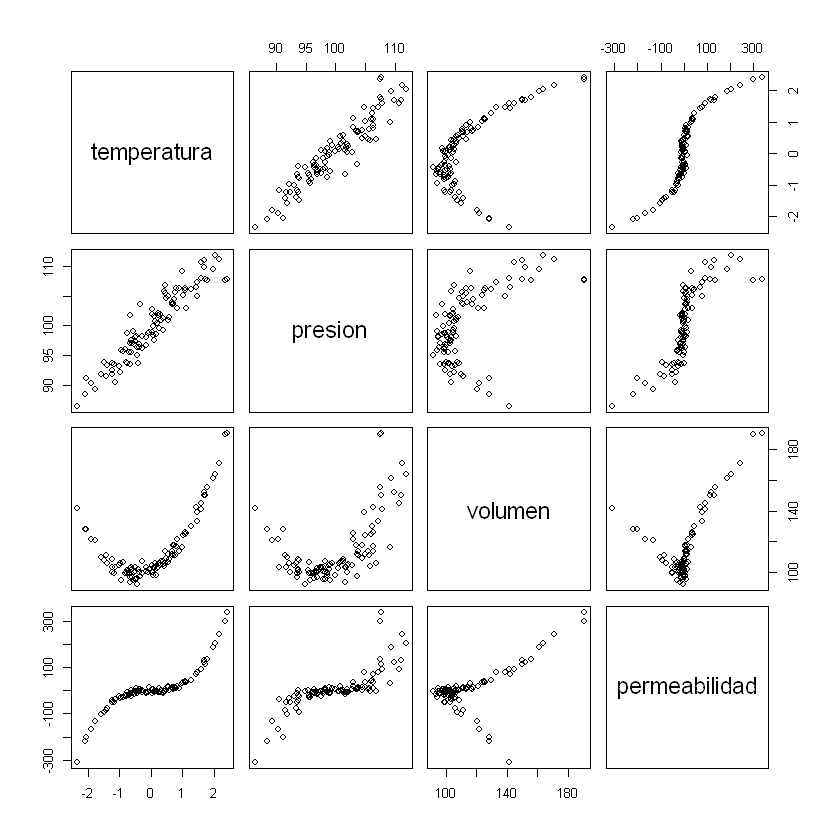

In [29]:
plot(data)

## Patrones de tendencia
* Presión depende linealmente de la temperatura
* Volumen depende cuadraticamente de la temperatura
* Permeabilidad depende cubicamente de la temperatura

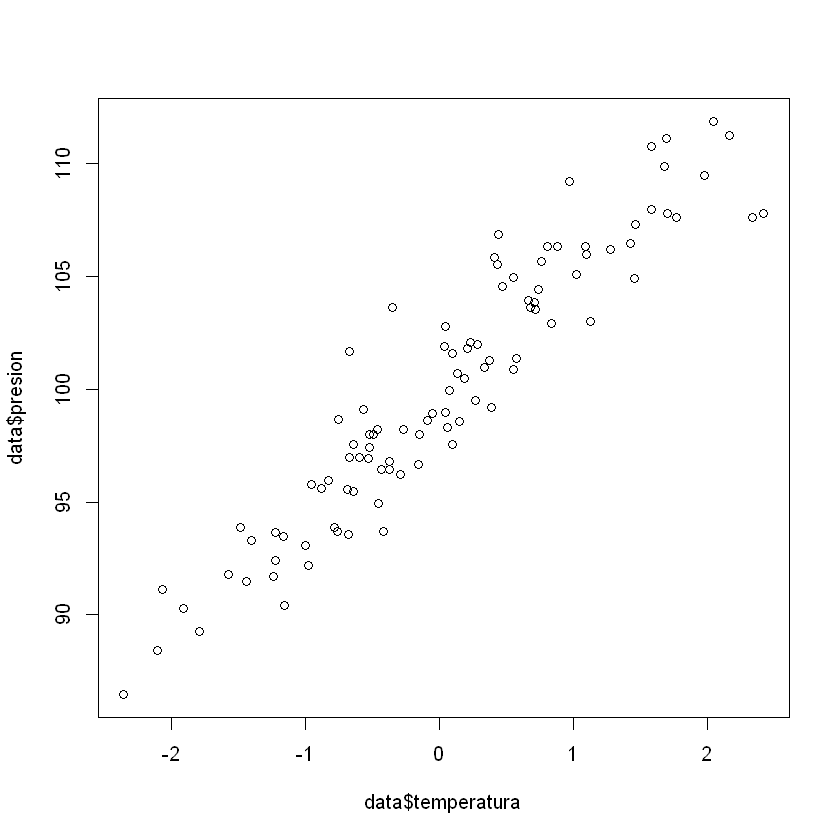

In [30]:
plot(data$temperatura,data$presion)

### Análisis de Presión v/s temperatura

In [31]:
reg1=lm(presion~temperatura,data=data)
summary(reg1)


Call:
lm(formula = presion ~ temperatura, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.6265 -1.1942 -0.0905  0.9167  5.6345 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  99.7940     0.1988  502.07   <2e-16 ***
temperatura   5.2176     0.1889   27.62   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.985 on 98 degrees of freedom
Multiple R-squared:  0.8862,	Adjusted R-squared:  0.885 
F-statistic: 763.1 on 1 and 98 DF,  p-value: < 2.2e-16


In [32]:
reg1$coef

(Intercept) temperatura 
  99.793991    5.217597

¿ Si la temperatura vale 3, cuanto vale la presión?

In [33]:
reg1$coef[1] + reg1$coef[2]*3

(Intercept) 
   115.4468

In [34]:
#genero una banda de predicciones
pp = seq(-3,3,0.05)

In [35]:
# Aplico el modelo de regresión a todos los puntos
predict = reg1$coef[1]*rep(1,length(pp))  + reg1$coef[2]*pp

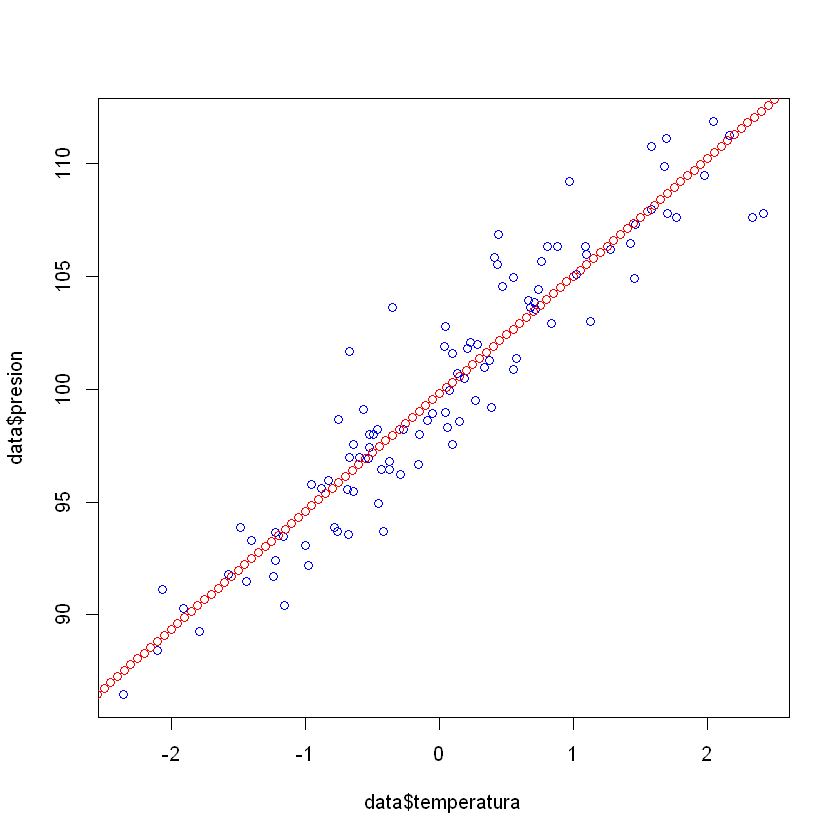

In [36]:
plot(data$temperatura,data$presion,col='blue')
points(pp,predict,col='red')

## Analisis Volumen v/s Temperatura

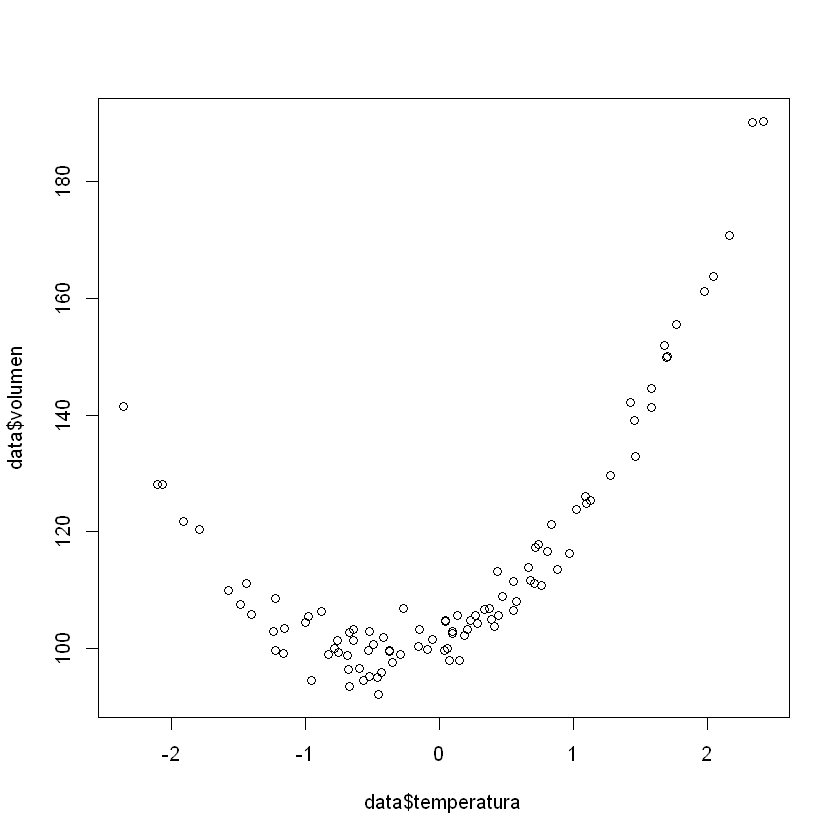

In [37]:
plot(data$temperatura,data$volumen)

In [38]:
#es correcto elevar los datos al cuadrado antes de introducirlos a la función lm
temperatura2 = data$temperatura^2

In [39]:
reg2=lm(volumen~temperatura+temperatura2,data=data)
summary(reg2)


Call:
lm(formula = volumen ~ temperatura + temperatura2, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6948 -2.4387  0.2211  1.9665  7.8977 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  100.8131     0.3944  255.58   <2e-16 ***
temperatura    9.9964     0.2978   33.56   <2e-16 ***
temperatura2  11.0460     0.2234   49.45   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.088 on 97 degrees of freedom
Multiple R-squared:  0.9776,	Adjusted R-squared:  0.9771 
F-statistic:  2114 on 2 and 97 DF,  p-value: < 2.2e-16


¿Si la temperatura vale 3, cuanto vale el volumen?

In [40]:
reg2$coef[1] + reg2$coef[2]*3 + reg2$coef[3]*3^2

(Intercept) 
   230.2169

In [41]:
#genero una banda de predicciones
pp = seq(-3,3,0.05)
# Aplico el modelo de regresión a todos los puntos
predict = reg2$coef[1]*rep(1,length(pp))  + reg2$coef[2]*pp + reg2$coef[3]*pp^2

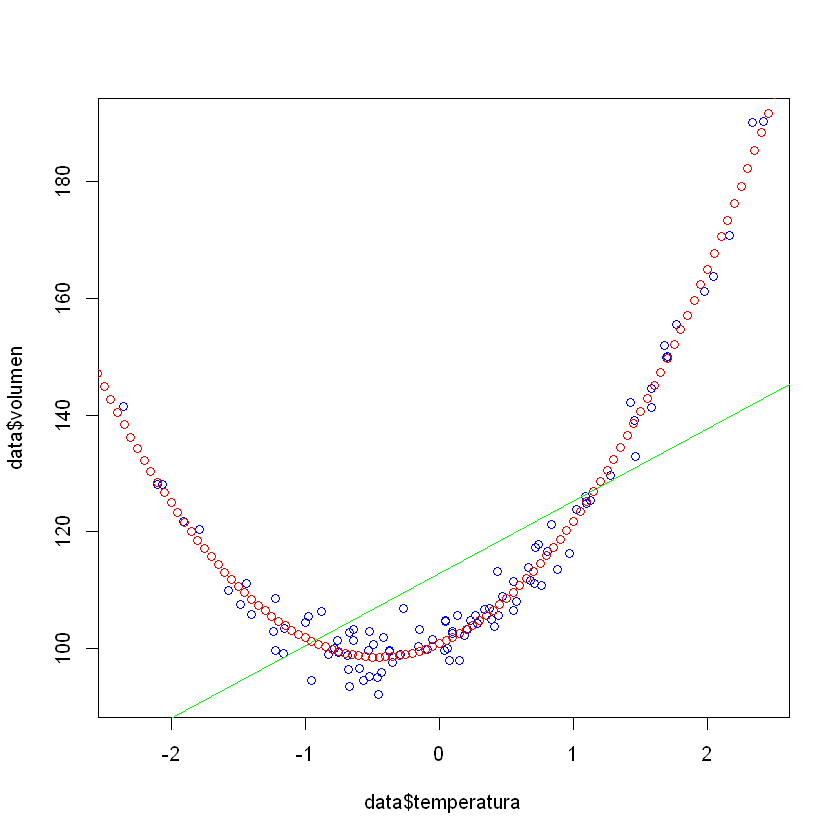

In [42]:
plot(data$temperatura,data$volumen,col='blue')
abline(lm(volumen~temperatura,data=data),col='green')
points(pp,predict,col='red')

## Analísis Permeabilidad v/s Temperatura

In [43]:
temperatura2 = data$temperatura^2
temperatura3 = data$temperatura^3

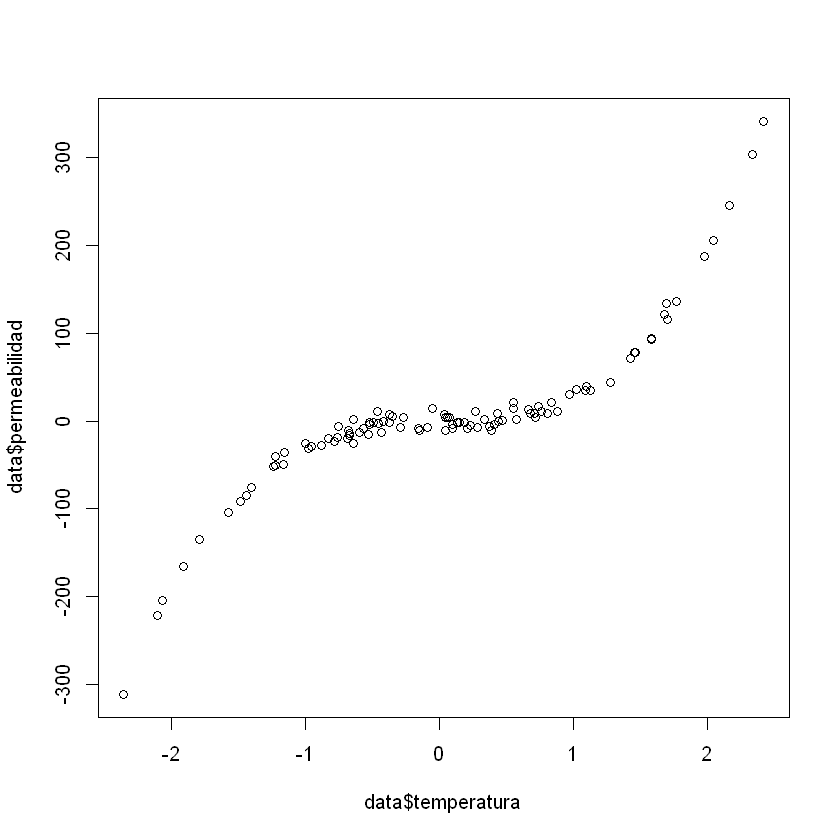

In [44]:
plot(data$temperatura,data$permeabilidad)

In [46]:
reg3=lm(permeabilidad~temperatura+temperatura3,data=data)
summary(reg3)


Call:
lm(formula = permeabilidad ~ temperatura + temperatura3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.8833  -5.0040  -0.7067   4.8829  16.9795 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -1.1729     0.6795  -1.726   0.0875 .  
temperatura    5.2487     1.2562   4.178 6.43e-05 ***
temperatura3  22.9350     0.3753  61.105  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.763 on 97 degrees of freedom
Multiple R-squared:  0.994,	Adjusted R-squared:  0.9938 
F-statistic:  7986 on 2 and 97 DF,  p-value: < 2.2e-16


¿Si la temperatura vale 3, cuanto vale el permeabilidad?


In [27]:
reg3$coef[1] + reg3$coef[2]*3  + reg3$coef[3]*3^3

(Intercept) 
   633.8194

In [30]:
#genero una banda de predicciones
pp = seq(-3,3,0.01)
# Aplico el modelo de regresión a todos los puntos
predict = reg3$coef[1]*rep(1,length(pp))  + reg3$coef[2]*pp+ reg3$coef[3]*pp^3

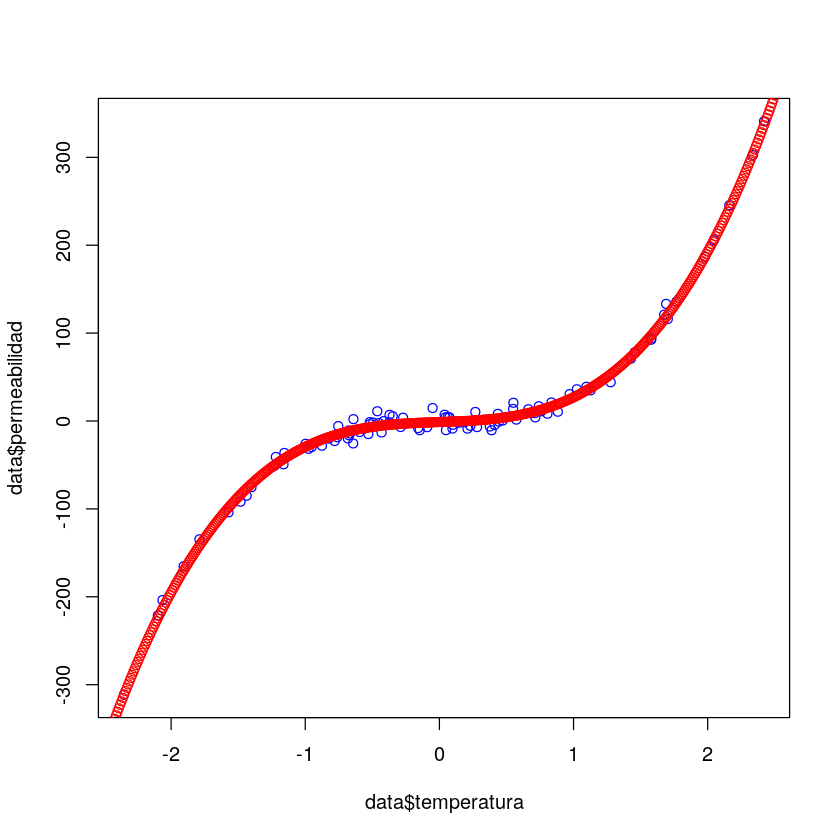

In [31]:
plot(data$temperatura,data$permeabilidad,col='blue')
points(pp,predict,col='red')

Esto corresponderá a buscar un vector de estimaciones $b^{tr}$ tal que una variable, por ejemplo, temperatura se puede regresar usando las demás como regresoras, en la forma
\begin{equation}
    \text{temperatura} = b_0 + b_1 \cdot \text{presion} + b_2 \cdot \text{volumen} + b_3 \cdot \text{permeabilidad}
\end{equation}
o bien, de alguna variación funcional de las variables del lado derecho de la última igualdad.

In [12]:
reg1 = lm(temperatura~ presion + volumen + permeabilidad, data)

In [13]:
summary(reg1)


Call:
lm(formula = temperatura ~ presion + volumen + permeabilidad, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.73832 -0.20305  0.03897  0.18320  0.56820 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -12.195485   0.721061 -16.913  < 2e-16 ***
presion         0.116901   0.007274  16.071  < 2e-16 ***
volumen         0.004636   0.001657   2.798  0.00622 ** 
permeabilidad   0.003832   0.000521   7.355  6.4e-11 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2623 on 96 degrees of freedom
Multiple R-squared:  0.9402,	Adjusted R-squared:  0.9384 
F-statistic: 503.5 on 3 and 96 DF,  p-value: < 2.2e-16


### Algunas operaciones sobre regresiones

* reg1$residuals : entrega el vector de residuos de la regresion reg1.
* confint(reg1) : entrega los intervalos de confianza para cada coeficiente con un 95% de confianza.

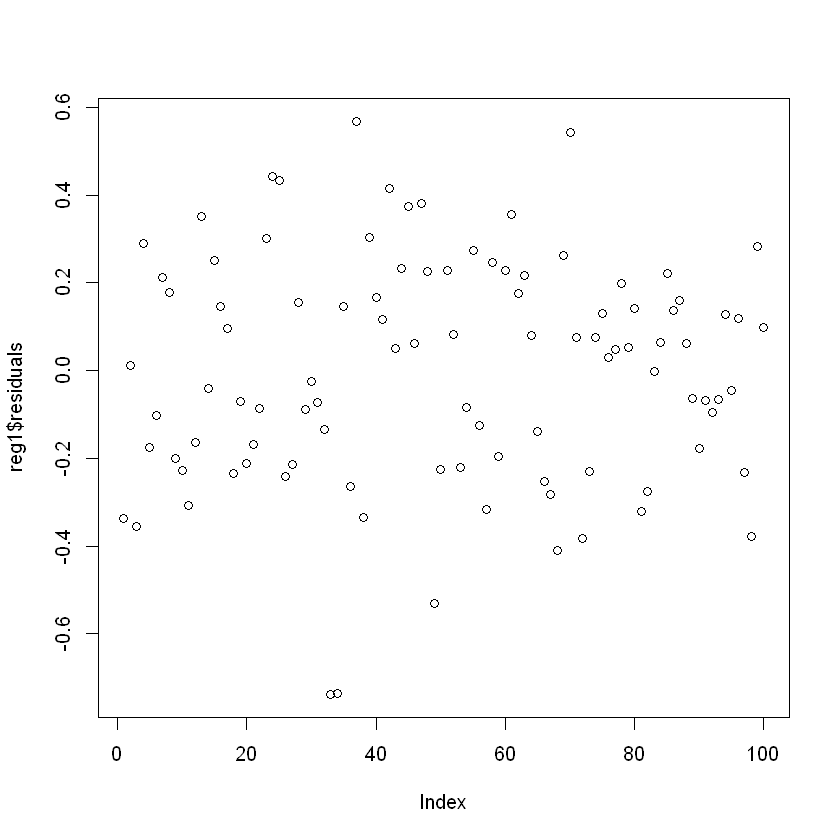

In [25]:
plot(reg1$residuals)

In [34]:
confint(reg1)

,2.5 %,97.5 %
(Intercept),-13.626779764,-10.764190185
presion,0.102462400,0.131340360
volumen,0.001346784,0.007925966
permeabilidad,0.002798150,0.004866641


---------------------------
---------------------------

## Heteroscedasticidad

La Heteroscedastidad es un fenómeno asociado a la varianza, gráficamente podemos estudiarla desde los gráficos de
* Residuos v/s Valores ajustados
* Residuos cuadráticos v/s Valores ajustados.
* Residuos cuadráticos v/s variables regresoras.

La presencia de heteroscedásticidad, o no homoscedásticidad tiene consecuencia sobre la eficiencia de los estimadores obtenidos por la regresión lineal

![im1](heteroscedasticidad.PNG)

![im1](heteroscedasticidad2.PNG)

Práctimanente, estudiaremos la presencia de Heteroscedastidad mediante los siguientes tests de hipótesis:
* Spearman 
    * cor(x, y, method = “spearman”)
    * cor.test(x, y, method = “spearman”)
    
   
* Goldfeld-Quandt
    * gqtest(model, order.by, data , fraction)
    
    
* White o Breusch-Pagan(Utilizaremos este test durante el curso)
    * bptest(formula, varformula = NULL, studentize = TRUE, data = list())
    

Para todos estos, se tienen las hipótesis
\begin{align*}
    H_0 : \text{Homoscedásticidad}.\\
    H_1 : \text{Heteroscedásticidad}.
\end{align*}

Es decir, si nuestro $p$-valor obtenido es mayor a $5\%$ no rechazamos la hipótesis nula.

In [32]:
#install.packages("lmtest")
library(lmtest)

In [33]:
bptest(reg1)


	studentized Breusch-Pagan test

data:  reg1
BP = 3.1441, df = 3, p-value = 0.3699


En este caso, $p$-valor es mayor a $0.05$ por lo que podemos considerar que nos encontramos en el caso Homoscedástico.

-----------
## Autocorrelación

La autocorrelación es un  fenómeno que puede presentarse en modelos con variables de tipo longitudinal (tomados a traves del tiempo) en que se consideran rezagos de una variable, esto es, si tomamos observaciones indexadas en tiempos $t$, 
\begin{equation*}
    Y_t = b_0 + b_1 X + b_2 Y_{t-1} + b_3 X_{t-1} \ldots
\end{equation*}
El fenómeno ocurre cuando una variable y sus rezagos presentan una correlación significativa.

Asímismo, podemos considerar la presencia de autocorrelación en los residuos dados por
\begin{equation}
    \varepsilon_i = Y_i - \hat{Y}_i
\end{equation}
Para esto, utilizamos el test de Durbin-Watson, cuyas hipótesis son
\begin{align*}
    H_0 &: \text{ No hay autocorrelacion,}\\
    H_1 &: \text{ La autocorrelación no es nula.}
\end{align*}

In [38]:
dwtest(reg1, alternative = "two.sided")


	Durbin-Watson test

data:  reg1
DW = 1.638, p-value = 0.06652
alternative hypothesis: true autocorrelation is not 0


-----------------
## Multicolinealidad

La multicolinealidad es un fenómeno asociado a los datos, esta se produce cuando alguna de las variables regresoras se puede obtener como combinación lineal de otras de las variables regresoras. Existen dos tipos de multicolinealidad.
* Multicolinealidad Perfecta: En que la combinación de variables regresoras que despejan a otra es exacta.
* Multicolinealidad Imperfecta o aproximada, que corresponde al caso contrario, en que el despeje se puede realizar con cierta significancia.

Cuando nos encontramos en el caso de multicolinealidad perfecta, no se puede realizar la regresión por lo que debemos evaluar la eliminacion de alguna de las variables involucradas en el modelo. Por otro lado, cuando nos encontramos en el caso de Multicolinealidad Imperfecta, se puede realizar la regresión lineal pero los indicadores de bondad de ajuste y varianza se verán afectados como sigue:
* La varianza de los estimadores $b_i$ aumenta, por lo que los intervalos de confianza crecen, haciendo que la inferencia sobre estos sea poco efectiva.

Para estudiar la presencia de multicolinealidad, utilizaremos el `Factor inflacionario de Varianza`, `VIF` por sus siglas en inglés. El criterio a utilizar es que si el valor de VIF es menor a 5, entonces no hay presencia de multicolinealidad, en caso de haber una o mas variables con VIF mayor a 5 removeremos la que tenga mayor valor asociado a ella y reevaluamos el modelo.

In [39]:
library('car')

In [40]:
vif(reg1)

presion       volumen permeabilidad 
     2.611259      1.647699      2.900972

Ninguna tiene `Vif` mayor a cinco, por lo que concluimos que no estamos en presencia de multicolinealidad.

---------------
---------------

## Ejercicios para el Control 4

1. Leer la base de datos `iris` (que está incluida en R). Ajustar un modelo de regresión lineal múltiple para la variable `Petal.Length` en función de todas las demás observaciones, y responda las siguientes preguntas:
    
        1.1 Con una significancia del 1\%, ¿Que variables regresoras son significativas?
        1.2 Realizar una regresión lineal eliminando la de menor significancia.
            1.2.1 ¿Cual de los dos modelos es mejor?¿Por qué?

In [47]:
data_iris= iris
head(data_iris)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


In [70]:
unique(data_iris$Species)

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

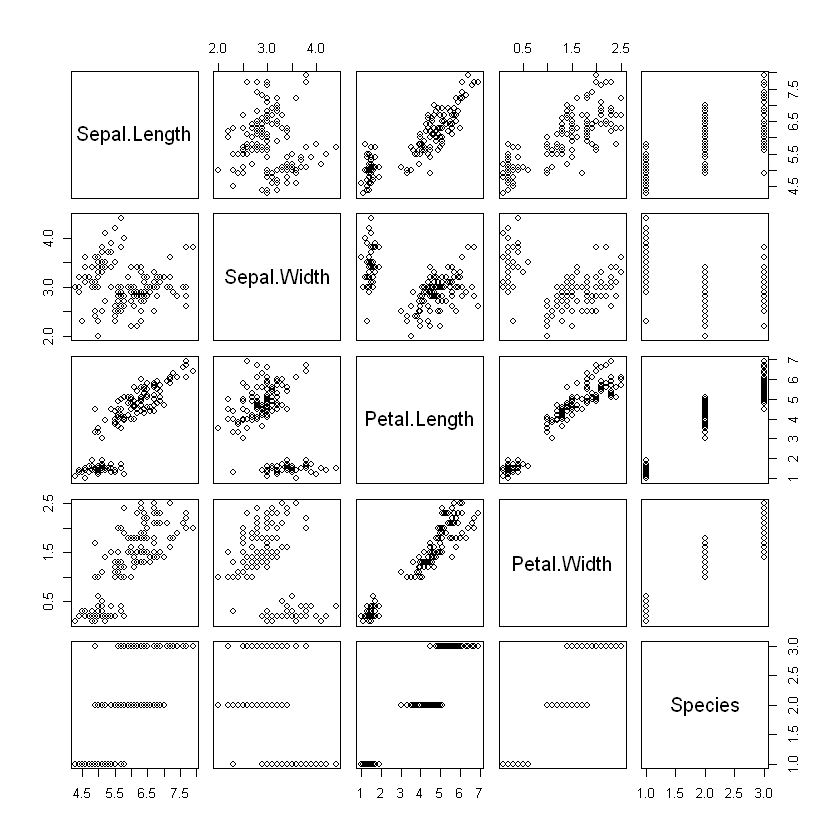

In [71]:
plot(data_iris)

In [72]:
reg_iris = lm(Petal.Length ~., data= data_iris)

In [73]:
reg_iris


Call:
lm(formula = Petal.Length ~ ., data = data_iris)

Coefficients:
      (Intercept)       Sepal.Length        Sepal.Width        Petal.Width  
          -1.1110             0.6080            -0.1805             0.6022  
Speciesversicolor   Speciesvirginica  
           1.4634             1.9742  


In [74]:
summary(reg_iris)


Call:
lm(formula = Petal.Length ~ ., data = data_iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.78396 -0.15708  0.00193  0.14730  0.65418 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.11099    0.26987  -4.117 6.45e-05 ***
Sepal.Length       0.60801    0.05024  12.101  < 2e-16 ***
Sepal.Width       -0.18052    0.08036  -2.246   0.0262 *  
Petal.Width        0.60222    0.12144   4.959 1.97e-06 ***
Speciesversicolor  1.46337    0.17345   8.437 3.14e-14 ***
Speciesvirginica   1.97422    0.24480   8.065 2.60e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2627 on 144 degrees of freedom
Multiple R-squared:  0.9786,	Adjusted R-squared:  0.9778 
F-statistic:  1317 on 5 and 144 DF,  p-value: < 2.2e-16


#### 1.1 Solo Sepal.Width es significativa para a=0.01

In [86]:
data_iris2 = data_iris[-1]
head(data2)

Sepal.Width,Petal.Length,Petal.Width,Species
3.5,1.4,0.2,setosa
3.0,1.4,0.2,setosa
3.2,1.3,0.2,setosa
3.1,1.5,0.2,setosa
3.6,1.4,0.2,setosa
3.9,1.7,0.4,setosa


In [87]:
reg_iris2 = lm(Petal.Length ~., data= data_iris2)
summary(reg_iris2)


Call:
lm(formula = Petal.Length ~ ., data = data_iris2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.00696 -0.20914  0.00046  0.17803  1.21235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)         0.4218     0.3373   1.251   0.2130    
Sepal.Width         0.2440     0.1023   2.385   0.0184 *  
Petal.Width         0.8281     0.1698   4.876 2.81e-06 ***
Speciesversicolor   2.0642     0.2352   8.776 4.28e-15 ***
Speciesvirginica    2.7267     0.3351   8.137 1.67e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3718 on 145 degrees of freedom
Multiple R-squared:  0.9568,	Adjusted R-squared:  0.9556 
F-statistic: 803.4 on 4 and 145 DF,  p-value: < 2.2e-16


#### En el primero modelo se tiene mejor $R^2$, por lo que decimos que este es mejor

---------------------
2. Utilizando la base de datos `casos.csv` se busca estimar mediante un modelo los casos de cierta enfermedad. En la base de datos las variables son
* x1: tiempo de la toma de dato
* y : número de casos 


Responda las siguientes preguntas

    2.1 Proponer un modelo de regresión simple argumentando su utilidad.
    2.2 Considere la transformacion logaritmica de ambas variables para realizar una nueva regresión, argumente la calidad de este nuevo modelo.

In [93]:
data_cases = read.csv('casos.csv')
head(data_cases)

y,x1
3.085303e+15,11.652540
1.846427e+15,11.152871
1.092214e+14,8.810365
1.349189e+14,9.022848
1.380492e+14,8.956830
4.844420e+14,10.030874


In [94]:
reg_casos = lm(y~., data_cases)

In [95]:
reg_casos


Call:
lm(formula = y ~ ., data = data_cases)

Coefficients:
(Intercept)           x1  
 -9.101e+15    1.000e+15  


In [96]:
summary(reg_casos)


Call:
lm(formula = y ~ ., data = data_cases)

Residuals:
       Min         1Q     Median         3Q        Max 
-6.180e+14 -4.216e+14 -2.181e+14  1.687e+14  7.212e+15 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.101e+15  2.318e+14  -39.27   <2e-16 ***
x1           1.000e+15  2.303e+13   43.42   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.172e+14 on 998 degrees of freedom
Multiple R-squared:  0.6539,	Adjusted R-squared:  0.6535 
F-statistic:  1885 on 1 and 998 DF,  p-value: < 2.2e-16


#### Utilidad del modelo:

In [98]:
nx = log(data_cases$x)
ny = log(data_cases$y)
reg_casos2 = lm(ny ~nx)

In [99]:
reg_casos2


Call:
lm(formula = ny ~ nx)

Coefficients:
(Intercept)           nx  
      6.193       12.008  


In [100]:
summary(reg_casos2)


Call:
lm(formula = ny ~ nx)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.199884 -0.037861  0.001086  0.043301  0.182634 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.19306    0.04434   139.7   <2e-16 ***
nx          12.00837    0.01927   623.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06048 on 998 degrees of freedom
Multiple R-squared:  0.9974,	Adjusted R-squared:  0.9974 
F-statistic: 3.885e+05 on 1 and 998 DF,  p-value: < 2.2e-16


#### Mejoras en el modelo:
    * Aumento en la bondad de ajuste